Iteration 1: Loss = 0.6931471805599454
Iteration 2: Loss = 0.6328211522065751
Iteration 3: Loss = 0.5823972949578101
Iteration 4: Loss = 0.5400400231011129
Iteration 5: Loss = 0.5042051102371915
Iteration 6: Loss = 0.4736389534183553
Iteration 7: Loss = 0.44734329598374695
Iteration 8: Loss = 0.4245298511469433
Iteration 9: Loss = 0.4045770169455826
Iteration 10: Loss = 0.38699321002389653

Final weights: [0.00903176 0.26230116 0.49949384]


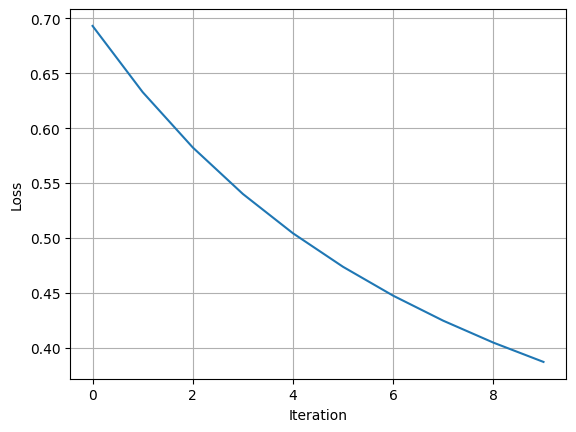

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import copy

# Generate synthetic data
np.random.seed(0)
centers = [[-5, 0], [0, 1.5]]
X, y = make_blobs(n_samples=1000, centers=centers, random_state=40)
transformation = [[0.4, 0.2], [-0.4, 1.2]]
X = np.dot(X, transformation)

# Add a bias term to the feature matrix
X = np.c_[np.ones((X.shape[0], 1)), X]

# Initialize coefficients
W = np.zeros(X.shape[1])

# Define the logistic sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Define the logistic loss (binary cross-entropy) function
def log_loss(y_true, y_pred):
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)  # Clip to avoid log(0)
    return - (y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

# Gradient descent and Newton method parameters
learning_rate = 0.1
iterations = 10
loss_history = []
N = X.shape[0]

for i in range(iterations):
    predictions = sigmoid(np.dot(X, W)) # Compute predictions
    gradient = np.dot(X.T, (predictions - y)) / N # Compute the gradient of the loss
    W -= learning_rate * gradient # Update the weights
    loss = np.mean(log_loss(y, predictions)) # Compute and print the loss for this iteration
    loss_history.append(loss)
    print(f"Iteration {i+1}: Loss = {loss}")

print("\nFinal weights:", W)

plt.plot(loss_history)
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.grid()


Iteration 1: Loss = 0.3713875460331649
Iteration 2: Loss = 0.14583549598725487
Iteration 3: Loss = 0.07241980586747639
Iteration 4: Loss = 0.04120679394128177
Iteration 5: Loss = 0.02695345835054742
Iteration 6: Loss = 0.020276763588121836
Iteration 7: Loss = 0.017366972151759693
Iteration 8: Loss = 0.01644306566679729
Iteration 9: Loss = 0.016310759072834153
Iteration 10: Loss = 0.016307135311082813

Final weights:
[11.71654648 10.20993069  4.43022645]


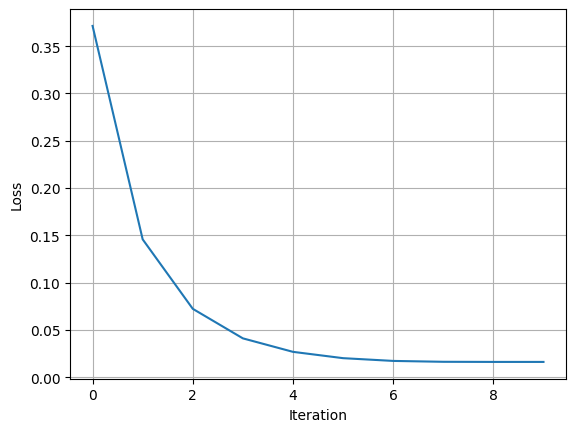

In [2]:
# Batch Newton's method parameters
loss_history_newton = []
iterations = 10
N = X.shape[0]

for t in range(iterations):
    predictions = sigmoid(np.dot(X, W))  # Compute predictions
    gradient = np.dot(X.T, (predictions - y)) / N  # Compute the gradient of the loss
    S = np.diag(predictions * (1 - predictions)) # Compute the diagonal matrix S
    H = np.dot(np.dot(X.T, S), X) / N # Compute the Hessian matrix H
    W -= np.dot(np.linalg.inv(H), gradient) # Update the weights using Newton's method
    loss = np.mean(log_loss(y, predictions)) # Compute and print the loss for this iteration

    print(f"Iteration {t+1}: Loss = {loss}")
    loss_history_newton.append(loss)

# Print the final weights
print("\nFinal weights:")
print(W)
plt.plot(loss_history_newton)
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.grid()



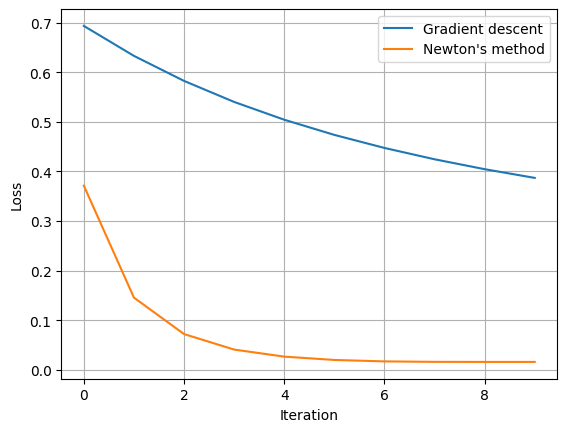

In [3]:
plt.plot(loss_history, label="Gradient descent")
plt.plot(loss_history_newton, label="Newton's method")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()


gradient needs more iterations